### Machine Learning In Medicine

In this project we attempt to model and predict, whether or not a doctor will prescribe "drug X" to a patient using their pre-existing factors.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from scipy import stats

import seaborn as sns


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_excel("/kaggle/input/horizon/HZNP_DataScience_Exercise.xlsx")



/kaggle/input/horizon/HZNP_DataScience_Exercise.xlsx


In [2]:
xls = pd.ExcelFile("/kaggle/input/horizon/HZNP_DataScience_Exercise.xlsx")
df1 = pd.read_excel(xls, 'Instructions')
df2 = pd.read_excel(xls, 'chart_review_data')

In [3]:
df2.shape

(1773, 84)

First we examine the shape of the dataframe and see how many rows/columns we are working with. 

In [4]:
df2.head(10)
#Nan values will have to be dealt with imputation

,patientID,age_at_rf_r1_dx,patient_gender,current_severity,severity_at_HZD_dx,age_current,HZD_dx_age,has_had_surgery,rf_r1_present,rf_r2_present,...,previously_tried_px4,previously_tried_px5,previously_tried_px6,previously_tried_px7,previously_tried_px8,previously_tried_px9,previously_tried_px10,previously_tried_px11,previously_tried_px12,recommend_Product_X
0,0,NaN,F,Moderate,Moderate,65,55,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,NaN,F,Moderate,Moderate,45,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,NaN,F,Moderate,Moderate,68,64,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,3,NaN,F,Moderate,Mild,41,35,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,71.0,M,Severe,Severe,74,72,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,5,NaN,F,Moderate,Moderate,53,49,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,6,31.0,F,Moderate,Moderate,32,32,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,7,56.0,F,Moderate,Moderate,71,56,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,8,42.0,F,Moderate,Moderate,44,44,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,9,NaN,F,Moderate,Moderate,70,69,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df2.describe(include="all")

,patientID,age_at_rf_r1_dx,patient_gender,current_severity,severity_at_HZD_dx,age_current,HZD_dx_age,has_had_surgery,rf_r1_present,rf_r2_present,...,previously_tried_px4,previously_tried_px5,previously_tried_px6,previously_tried_px7,previously_tried_px8,previously_tried_px9,previously_tried_px10,previously_tried_px11,previously_tried_px12,recommend_Product_X
count,1773.000000,1242.000000,1773,1766,1747,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,...,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1773.000000
unique,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,Moderate,Moderate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1167,1582,1070,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,886.000000,41.522544,NaN,NaN,NaN,49.567964,45.252679,0.132544,0.653694,0.061478,...,0.383701,0.194397,0.114601,0.084890,0.050934,0.085739,0.078947,0.044992,0.029711,0.416244
std,511.965331,14.229609,NaN,NaN,NaN,13.858790,13.135189,0.339177,0.475926,0.240272,...,0.486493,0.395904,0.318675,0.278836,0.219956,0.280096,0.269771,0.207374,0.169862,0.493074
min,0.000000,0.000000,NaN,NaN,NaN,19.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,443.000000,32.000000,NaN,NaN,NaN,39.000000,35.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,886.000000,40.000000,NaN,NaN,NaN,49.000000,45.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1329.000000,52.000000,NaN,NaN,NaN,61.000000,55.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Looking at quick summary statistics of the dataframe. From observing the different counts we can see that some columns are missing hundreds of values. But we know that there are 1773 patients that seeked treatment. 

### Data Cleaning

In [6]:
age_mean = df2.age_at_rf_r1_dx.mean()

df2.age_at_rf_r1_dx.fillna(age_mean, axis=0, inplace=True)
horizon = df2.fillna(df2.mode().iloc[0])
horizon.head()

,patientID,age_at_rf_r1_dx,patient_gender,current_severity,severity_at_HZD_dx,age_current,HZD_dx_age,has_had_surgery,rf_r1_present,rf_r2_present,...,previously_tried_px4,previously_tried_px5,previously_tried_px6,previously_tried_px7,previously_tried_px8,previously_tried_px9,previously_tried_px10,previously_tried_px11,previously_tried_px12,recommend_Product_X
0,0,41.522544,F,Moderate,Moderate,65,55,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,41.522544,F,Moderate,Moderate,45,35,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,41.522544,F,Moderate,Moderate,68,64,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,3,41.522544,F,Moderate,Mild,41,35,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,71.000000,M,Severe,Severe,74,72,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


For this column decided to fill it with the means of age for the age at the RFR1 drug.

### Visualization

For the binary values across the table, I decided to fill it by the most often occurring value (mode) to keep some uniformity. 

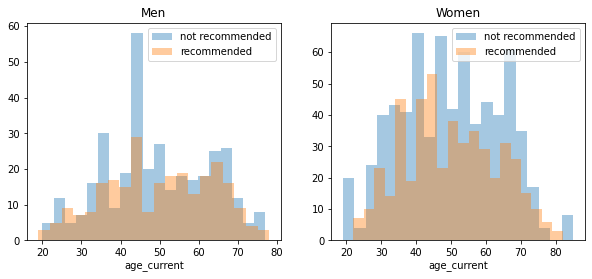

In [7]:
men = horizon[horizon['patient_gender'] == 'M']
women = horizon[horizon['patient_gender'] == 'F']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

ax = sns.distplot(men[men['recommend_Product_X'] ==0].age_current, 
                 bins =20, label = 'not recommended', ax = axes[0], kde =False)
ax = sns.distplot(men[men['recommend_Product_X'] ==1].age_current, 
                  bins = 20, label = 'recommended', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Men')

ax = sns.distplot(women[women['recommend_Product_X'] ==0].age_current, 
                 bins =20, label = 'not recommended',ax = axes[1], kde =False)
ax = sns.distplot(women[women['recommend_Product_X'] ==1].age_current, 
                  bins = 20, label = 'recommended',ax = axes[1], kde =False)
_ = ax.set_title('Women')
ax.legend()

Examining a dist plot of the men vs women with the patients getting the drugs recommended or not recommended. It appears that women were more likely to get the drug recommended than men across all ages. While specifically for men ~40 year olds were not recommended by a wide margin. 

In [8]:
horizon = horizon.reindex(np.random.permutation(horizon.index))
horizon.head(10)

,patientID,age_at_rf_r1_dx,patient_gender,current_severity,severity_at_HZD_dx,age_current,HZD_dx_age,has_had_surgery,rf_r1_present,rf_r2_present,...,previously_tried_px4,previously_tried_px5,previously_tried_px6,previously_tried_px7,previously_tried_px8,previously_tried_px9,previously_tried_px10,previously_tried_px11,previously_tried_px12,recommend_Product_X
509,509,36.000000,M,Severe,Moderate,54,34,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1116,1116,38.000000,F,Moderate,Severe,45,41,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
888,888,41.522544,F,Moderate,Severe,38,35,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1578,1578,41.522544,M,Moderate,Moderate,70,58,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1766,1766,56.000000,M,Moderate,Mild,58,53,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1220,1220,37.000000,M,Moderate,Severe,44,37,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
434,434,18.000000,F,Moderate,Mild,19,17,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
718,718,37.000000,F,Severe,Moderate,41,37,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1317,1317,41.522544,F,Moderate,Moderate,85,82,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
887,887,41.522544,F,Moderate,Mild,74,72,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
horizon_target = horizon.recommend_Product_X

Creating the target variable to classify

In [10]:
horizontable = pd.get_dummies(horizon[['patient_gender','current_severity','severity_at_HZD_dx','age_current', 
        'HZD_dx_age', 'has_had_surgery',
       'rf_r1_present', 'rf_r2_present', 'rf_r3_present', 'rf _r4_present',
       'rf_r5_present', 'rf_r6_present', 'had_dx1_at_HZD_dx',
       'had_dx2_at_HZD_dx', 'had_dx3_at_HZD_dx', 'had_dx4_at_HZD_dx',
       'had_dx5_at_HZD_dx', 'had_dx6_at_HZD_dx', 'had_dx7_at_HZD_dx',
       'had_dx8_at_HZD_dx', 'had_dx9_at_HZD_dx', 'had_dx10_at_HZD_dx',
       'had_dx11_at_HZD_dx', 'had_dx12_at_HZD_dx', 'had_dx13_at_HZD_dx',
       'had_dx14_at_HZD_dx', 'had_dx15_at_HZD_dx', 'had_dx16_at_HZD_dx',
       'had_dx17_at_HZD_dx', 'had_dx18_at_HZD_dx', 'had_dx19_at_HZD_dx',
       'had_dx20_at_HZD_dx', 'had_dx21_at_HZD_dx', 'currently_has_dx1',
       'currently_has_dx2', 'currently_has_dx3', 'currently_has_dx4',
       'currently_has_dx5', 'currently_has_dx6', 'currently_has_dx7',
       'currently_has_dx8', 'currently_has_dx9', 'currently_has_dx10',
       'currently_has_dx11', 'currently_has_dx12', 'currently_has_dx13',
       'currently_has_dx14', 'currently_has_dx15', 'currently_has_dx16',
       'currently_has_dx17', 'currently_has_dx18', 'currently_has_dx19',
       'currently_has_dx20', 'currently_has_dx21', 'has_ever_had_dx22',
       'has_ever_had_dx23', 'px_count_for_HZD_tried', 'currently_using_px1',
       'currently_using_px2', 'currently_using_px3', 'currently_using_px4',
       'currently_using_px5', 'currently_using_px6', 'currently_using_px7',
       'currently_using_px8', 'currently_using_px9', 'currently_using_px10',
       'currently_using_px11', 'currently_using_px12', 'previously_tried_px1',
       'previously_tried_px2', 'previously_tried_px3', 'previously_tried_px4',
       'previously_tried_px5', 'previously_tried_px6', 'previously_tried_px7',
       'previously_tried_px8', 'previously_tried_px9', 'previously_tried_px10',
       'previously_tried_px11', 'previously_tried_px12']])
horizontable.head()

,age_current,HZD_dx_age,has_had_surgery,rf_r1_present,rf_r2_present,rf_r3_present,rf _r4_present,rf_r5_present,rf_r6_present,had_dx1_at_HZD_dx,...,previously_tried_px10,previously_tried_px11,previously_tried_px12,patient_gender_F,patient_gender_M,current_severity_Moderate,current_severity_Severe,severity_at_HZD_dx_Mild,severity_at_HZD_dx_Moderate,severity_at_HZD_dx_Severe
509,54,34,0,1,0,0,0,2,1.0,0,...,0.0,0.0,0.0,0,1,0,1,0,1,0
1116,45,41,1,1,1,0,0,1,1.0,0,...,0.0,0.0,0.0,1,0,1,0,0,0,1
888,38,35,0,0,0,0,0,1,1.0,0,...,0.0,0.0,0.0,1,0,1,0,0,0,1
1578,70,58,0,0,0,0,1,2,1.0,0,...,0.0,0.0,0.0,0,1,1,0,0,1,0
1766,58,53,0,1,0,0,0,2,1.0,0,...,0.0,0.0,0.0,0,1,1,0,1,0,0


Turning the dataframe categorical values into dummy variables for classification. 

In [11]:
from sklearn.model_selection import train_test_split

horizon_train, horizon_test, horizon_target_train, horizon_target_test = train_test_split(horizontable, horizon_target, test_size=0.2, random_state=42)
print(horizon_train.shape)
print(horizon_test.shape)

(1418, 85)
(355, 85)


In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(horizon_train)
horizon_train_norm = min_max_scaler.fit_transform(horizon_train)
horizon_test_norm = min_max_scaler.fit_transform(horizon_test)
horizon_target_train = np.array(horizon_target_train)
horizon_target_test = np.array(horizon_target_test)

Scaling the variables so columns with different units do not adversely affect the analysis.

### Creating Machine Learning Models
horizon_train_norm  (x train)
horizon_test_norm (x test)
horizon_target_train (y train)

Accuracy =  0.79


<Figure size 720x720 with 0 Axes>

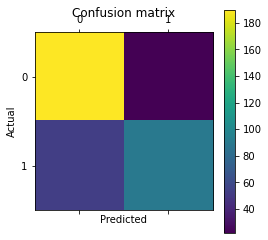

[[190  22]
 [ 53  90]]


In [13]:
#nearest neighbor classifier
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix

n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(horizon_train_norm, horizon_target_train)
knnpreds_test = knnclf.predict(horizon_test_norm)
#print(knnpreds_test)
knncm = confusion_matrix(horizon_target_test, knnpreds_test)

print('Accuracy =  %0.2f' % knnclf.score(horizon_test_norm, horizon_target_test))
import pylab as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(knncm)


Initial output of KNN classifier yield accuracy of 80%. By viewing the confusion matrix we can see the makeup of true/false - negatives/positives. There are less false positives (24), than false negatives (48). Recall measures out of all the positive classes how many did we predict correctly in this case its: 65.9%. The precision is out of all our positive predicted classes how many are actually positive and is 79%. In this case of predicting drug recommendations having higer precision is more important since the company could lose money on wrong positive predictions. 

In [14]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(horizon_train_norm, horizon_target_train)
Y_pred = sgd.predict(horizon_test_norm)

sgd.score(horizon_train_norm, horizon_target_train)

acc_sgd = round(sgd.score(horizon_train_norm, horizon_target_train) * 100, 2)


print(round(acc_sgd,2,), "%")

63.68 %


Running stochastic gradient descent learning yields a ~30% decrease in accuracy. 

#### Decision Tree

In [15]:
# Decision Tree
from sklearn import tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(horizon_train, horizon_target_train)

Y_pred = decision_tree.predict(horizon_test)

acc_decision_tree = round(decision_tree.score(horizon_train, horizon_target_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.93 %


In [16]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(horizon_train_norm, horizon_target_train)

Y_prediction = random_forest.predict(horizon_test_norm)

random_forest.score(horizon_train_norm, horizon_target_train)
acc_random_forest = round(random_forest.score(horizon_train_norm, horizon_target_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.93 %


Both random forest and decision trees appear to have near perfect accuracy 

But lets run through a few more models just to observe how they go

#### Extra Models

In [17]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(horizon_train_norm, horizon_target_train)

Y_pred = logreg.predict(horizon_test_norm)

acc_log = round(logreg.score(horizon_train_norm, horizon_target_train) * 100, 2)
print(round(acc_log,2,), "%")

71.79 %


In [18]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(horizon_train_norm, horizon_target_train)

Y_pred = linear_svc.predict(horizon_test_norm)

acc_linear_svc = round(linear_svc.score(horizon_train_norm, horizon_target_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

71.58 %


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(horizon_train_norm, horizon_target_train)

Y_pred = perceptron.predict(horizon_test_norm)

acc_perceptron = round(perceptron.score(horizon_train_norm, horizon_target_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

60.08 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [20]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(horizon_train_norm, horizon_target_train)

Y_pred = gaussian.predict(horizon_test_norm)

acc_gaussian = round(gaussian.score(horizon_train_norm, horizon_target_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

65.94 %


In [21]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.93,Random Forest
99.93,Decision Tree
71.79,Logistic Regression
71.58,Support Vector Machines
65.94,Naive Bayes
63.68,Stochastic Gradient Decent
60.08,Perceptron


Results of all the ML algorithims aggregated to one spot. As expected decision tree/random forest remained the best at classifying this dataset.

Since random forest produced the best results lets run more analysis using it. 

In [22]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, horizon_train, horizon_target_train, cv=10, scoring = "accuracy")

In [23]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80985915 0.85915493 0.84507042 0.80985915 0.81690141 0.87323944
 0.85915493 0.84507042 0.84397163 0.84397163]
Mean: 0.8406253121566278
Standard Deviation: 0.020659682333031677


In [24]:
importances = pd.DataFrame({'feature':horizontable.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [25]:
importances.head()

,importance
feature,
age_current,0.066
HZD_dx_age,0.065
px_count_for_HZD_tried,0.029
rf_r5_present,0.025
previously_tried_px4,0.020


The most important features by a wide margin are the patients age when taking another drug HZD and theyre current age. px count, rf_r5 and severity of pain are also important for whether the drug was recommended or not,

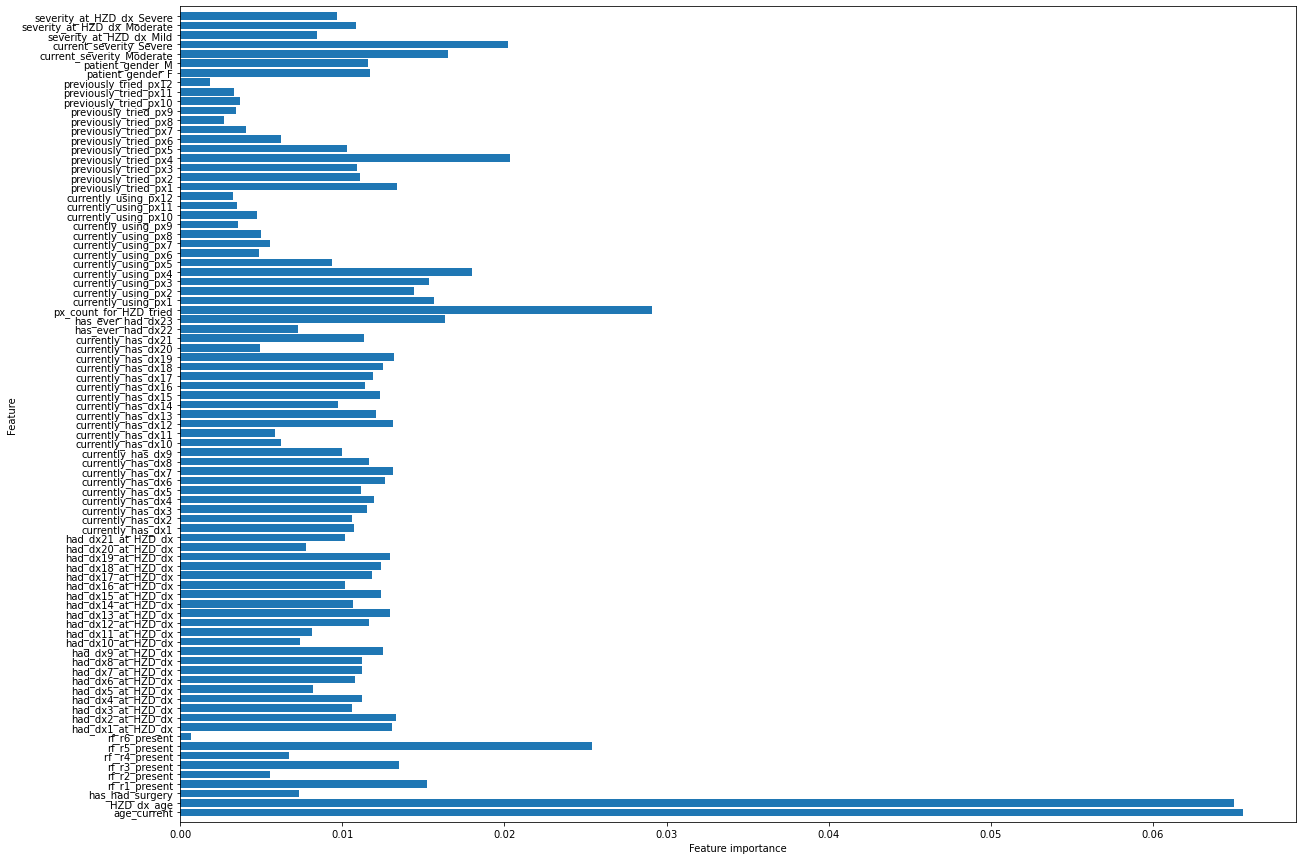

In [26]:
def plot_feature_importances(model, n_features, feature_names):
    plt.rcParams["figure.figsize"] = (20,15)

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.rcParams["figure.figsize"] = (20,7)

    
horizon_names = horizontable.columns.values
horizon_names

features = horizon_names[1:]
plot_feature_importances(random_forest, len(horizon_names), horizon_names)

In [27]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, horizon_train, horizon_target_train, cv=3)
confusion_matrix(horizon_target_train, predictions)

array([[763,  60],
       [215, 380]])

The first row is about the not-recommended-predictions: 758 patients were correctly classified as not recommended (called true negatives) and 64 where wrongly classified as not recommended (false negatives).

The second row is about the recommended-predictions: 219 patients where wrongly classified as recommended (false positives) and 377 where correctly classified as recommended (true positives).


In [28]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(horizon_target_train, predictions))
print("Recall:",recall_score(horizon_target_train, predictions))

Precision: 0.8636363636363636
Recall: 0.6386554621848739


Our model predicts 80% of the time, a patients recommendation correctly (precision). The recall tells us that it predicted the recommendation of 63 % of the patients who actually recieved the prescription. Since we are interested in precision and getting the actual recommendations this model is adequate at 80%. 

### Precision Recall Curve


In [29]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(horizon_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(horizon_target_train, y_scores)

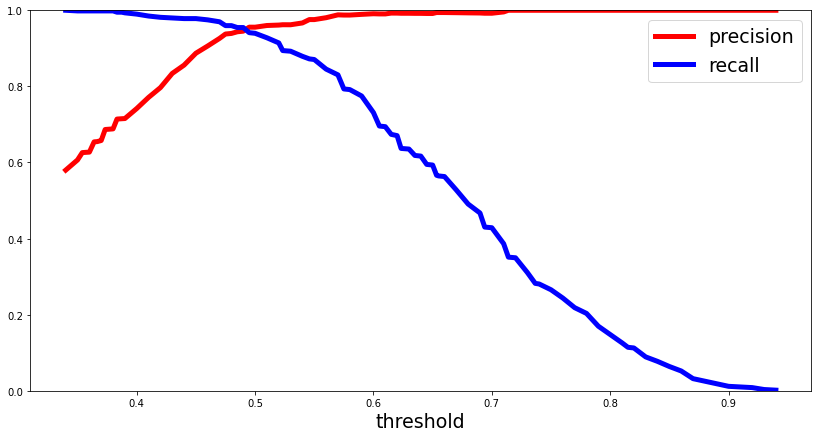

In [30]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

The optimal precision recall threshold appears to be 0.5. Where both precision and recall are in the 90s. 

## Roc Auc Score

In [31]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(horizon_target_train, y_scores)

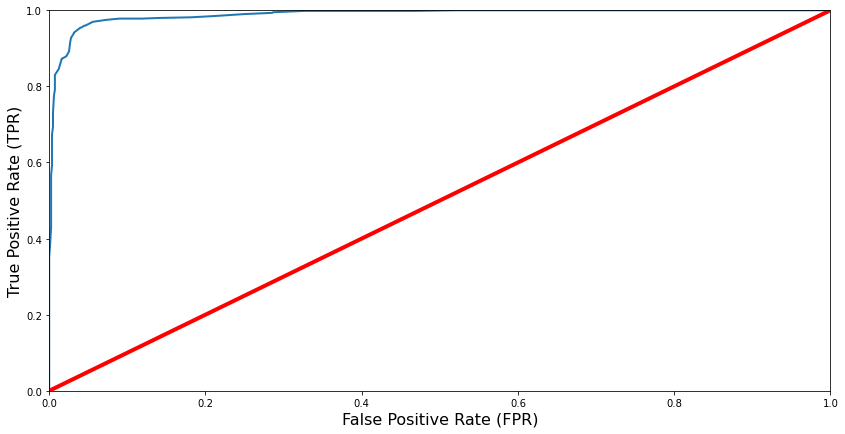

In [32]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(horizon_target_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9886130880055547


ROC curve of decision tree is great! We want as high true positives as possible with low false positive rates. 

### Looking at the decision tree branches 

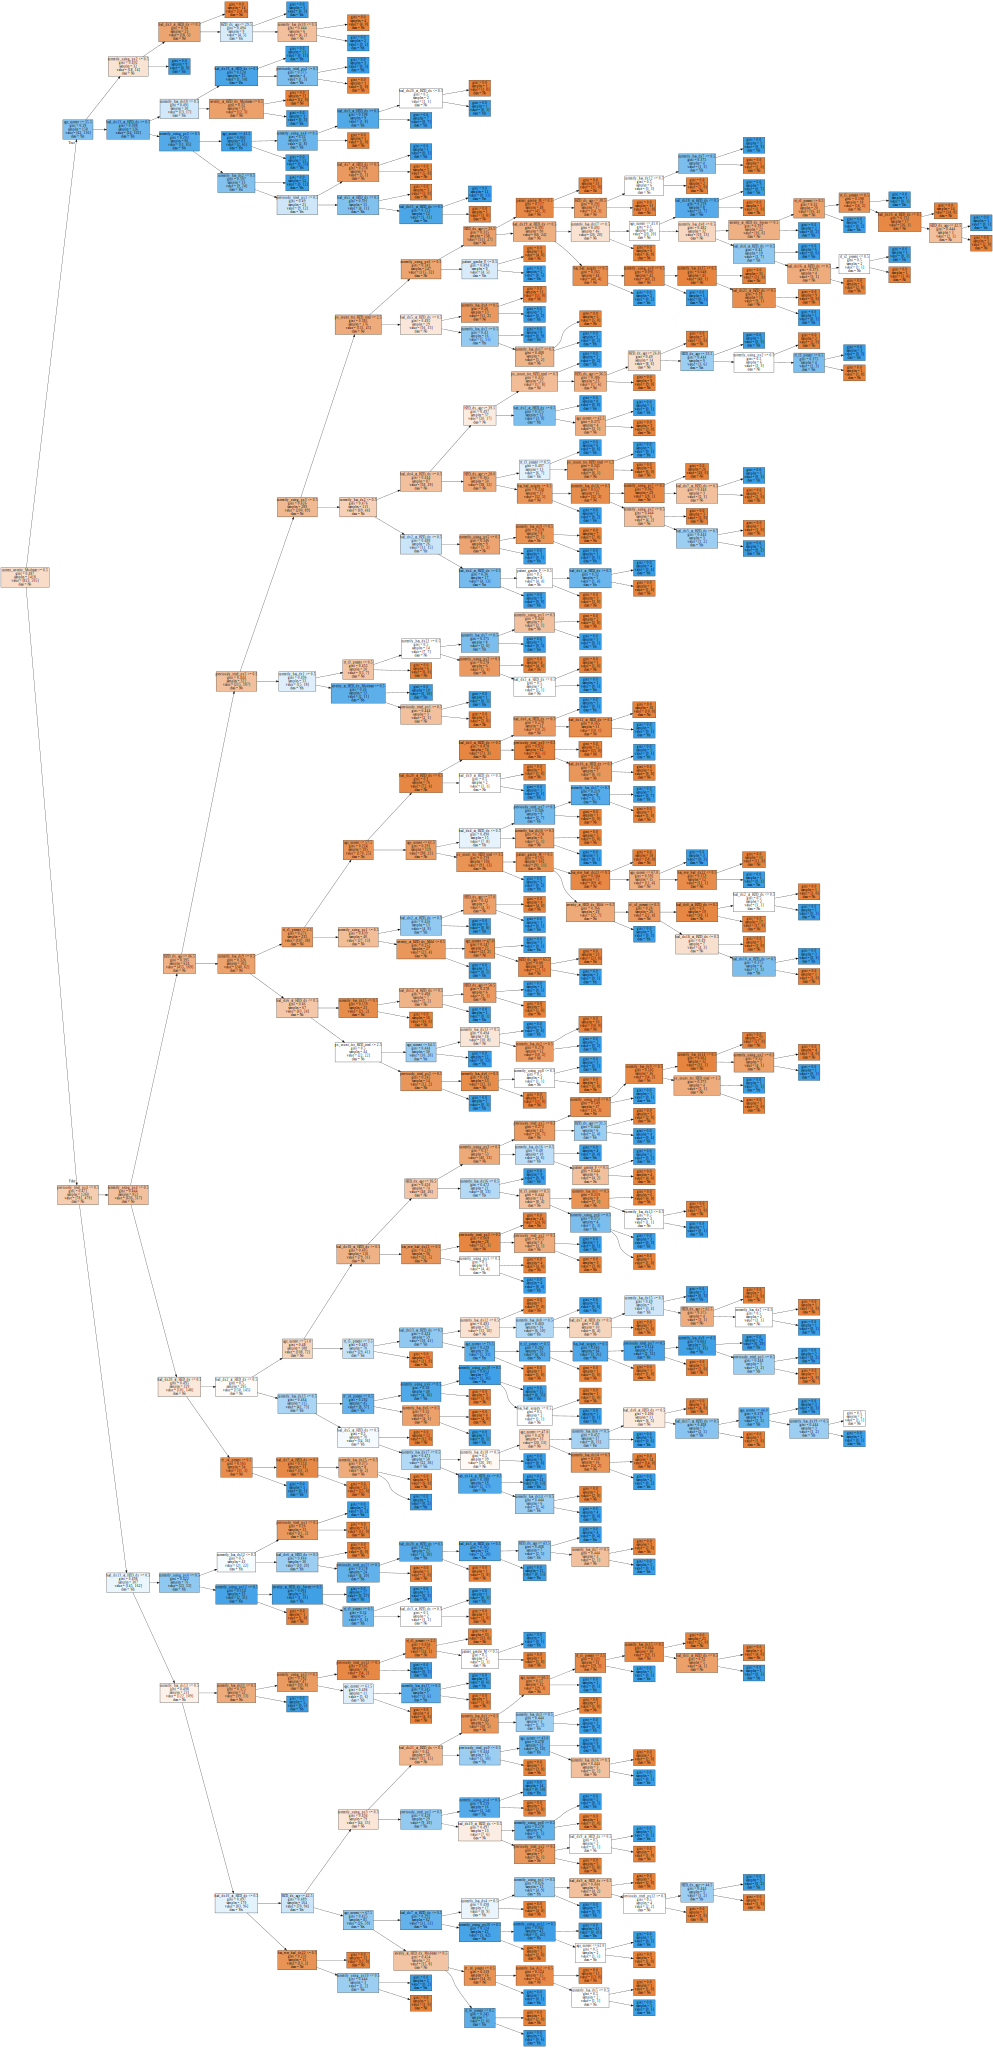

In [34]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


tree = export_graphviz(decision_tree, out_file=None, feature_names=horizon_names, class_names=['No','Yes'], filled = True, rotate = True)
graph = Source(tree)
graph

Lets look at how the model will perform with models optimized for boosting accuracy. 

In [35]:
#Using Adaboost to improve model accuracy with 100 weak trees
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,   random_state=0)
scores = cross_val_score(clf, horizon_train, horizon_target_train, cv=5)
print('Original decision tree accuracy', scores.mean())

ada = AdaBoostClassifier(n_estimators=100)
scores1 = cross_val_score(ada, horizon_train, horizon_target_train, cv=5)
print('Boosted decision tree accuracy', scores1.mean())

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(horizon_train, horizon_target_train)
print('Gradient Boosted score', gbc.score(horizon_test, horizon_target_test))

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(RandomForestClassifier(n_estimators=100), max_samples=0.5, max_features=0.5,
                   n_estimators=25, random_state=5).fit(horizon_train, horizon_target_train)
print('Bagging score', bagging.score(horizon_train, horizon_target_train))



Original decision tree accuracy 0.7446971582143034
Boosted decision tree accuracy 0.6706639128054547
Gradient Boosted score 0.6535211267605634
Bagging score 0.9717912552891397
